# Trabalho final ML

<a href="https://www.kaggle.com/code/reihanenamdari/depression-logistic-regression-and-gridsearchcv/data">Dataset</a>
<br>
<hr>

<br>

#### Contexto e objetivo do trabalho
O trabalho prático da disciplina CMP263 - Aprendizagem de Máquina visa
permitir que os alunos desenvolvam um modelo preditivo para um problema de
interesse, praticando aspectos discutidos na disciplina relacionados ao treinamento e
avaliação de modelos de classificação ou regressão, e interpretação dos modelos
gerados.
A proposta do projeto final é que os alunos aprofundem e consolidem sua
experiência no desenvolvimento de modelos preditivos, abordando aspectos ao
longo de toda a metodologia de treinamento de modelos, conforme discutimos em
aula. 

## Metodologia

CRISP-DM

1. Entendimento do negócio
2. Entendimento dos dados
3. Preparação dos dados
4. Modelagem
5. Validação
6. Deployment

## 1. Entendimento do negócio

### About Dataset
##### Context


O dataset original foi publicado pro Frankcc no seguinte link: <a href="https://www.kaggle.com/datasets/diegobabativa/depression?resource=download">Link Kaggle</a>

O dataset está envolvido na análise da depressão. Os dados consistem de um estudo das condições de vida de pessoas que vivem em zonas rurais. 

- Conteúdo
1. Surveyid 
2. Villeid
3. sex
4. Age
5. Married
6. Numberchildren 
7. educationlevel
8. totalmembers (in the family) 
9. gainedasset
10. durableasset 
11. saveasset
12. livingexpenses 
13. otherexpenses
14. incomingsalary 
15. incomingownfarm 
16. incomingbusiness
17. incomingnobusiness
18. incomingagricultural 
19. farmexpenses
20. laborprimary 
21. lastinginvestment
22. nolastinginvestmen
23. depressed: [ Zero: No depressed] or [One: depressed] (Binary for target class)

the main objective is to show statistic analysis and some data mining techniques.

The dataset has 23 columns or dimensions and a total of 1432 rows or objects.

Acknowledgements
The original attribution is to Frankcc i

Inspiration

<a href="https://zindi.africa/competitions/busara-mental-health-prediction-challenge/data">Busara</a>

## Problema

Classificação -  objetivo é treinar o melhor classificador possível para detectar o risco de depressão, pois os dados da depressão são categóricos (0,1). Induz um classificador, gerando saídas em um domínio discreto, não ordenado 

yk = f (xk) ∈ {c1, c2, …, cm},
onde m é o número de classes.
Para m = 2: classificação binária
Para m > 2: classificação multiclasse

- Classificação binária

Pergunta:

- 1. Dada as características socioeconômicas do indivíduo no survey, é possível classificar de forma assertiva se este indivíduo é depressivo ou não?


Tirando esta parte, você precisa avaliar as necessidades de pré-processamento dos dados, como imputar valor faltantes, tratar outliers, normalizar, balancear as classes, etc... Você pode aplicar seleção de atributos se deseja avaliar se um subconjunto dos atributos originais já lhe dar bom poder preditivo.

Esse pipeline será integrado a algoritmos de classificação (veja bem, suas saídas são numéricas, mas não se trata de uma regressão. Você tem valores na classe 0 ou 1, pois as classes foram codificadas dessa forma) - e o objetivo será treinar o melhor classificador possível para detectar o risco de depressão.

 

## Configs de ambiente

<hr>
SO - Ubuntu 20.4
<br>
Python version - 3.7.6
<br>
Conda version version - 4.8.2


<hr>


In [120]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing import sequence
import seaborn as sns
import matplotlib.pyplot as plt
import os
from mpl_toolkits.mplot3d import Axes3D
from tqdm.notebook import trange, tqdm
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
np.set_printoptions(suppress=True)
pd.set_option('display.max_columns', None)
import random as r


%matplotlib inline

## i) análise exploratória dos dados
para identificar possíveis problemas nos
dados que possam impactar negativamente no treinamento de modelos;

In [121]:
for dirname, _, filenames in os.walk('./Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./Dataset/datasetComUndersampling.ipynb
./Dataset/test.csv
./Dataset/datasetSemOutliers.ipynb
./Dataset/train.csv
./Dataset/depressed.csv
./Dataset/dataset.ipynb


In [122]:
target_column_name = 'depressed'

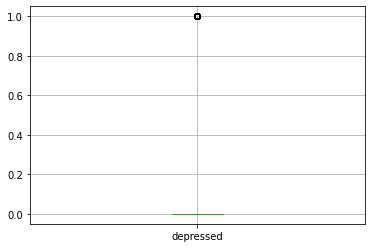

In [123]:
df_depressed_dataset = pd.read_csv("Dataset/depressed.csv")

# Create a boxplot of life expectancy per region
df_depressed_dataset.boxplot('depressed')

# Show the plot
plt.show()


In [124]:
df_depressed_dataset.head()

,surveyid,village,survey_date,femaleres,age,married,children,hhsize,edu,hh_children,hh_totalmembers,cons_nondurable,asset_livestock,asset_durable,asset_phone,asset_savings,asset_land_owned_total,asset_niceroof,cons_allfood,cons_ownfood,cons_alcohol,cons_tobacco,cons_med_total,cons_med_children,cons_ed,cons_social,cons_other,ent_wagelabor,ent_ownfarm,ent_business,ent_nonagbusiness,ent_employees,ent_nonag_revenue,ent_nonag_flowcost,ent_farmrevenue,ent_farmexpenses,ent_animalstockrev,ent_total_cost,fs_adskipm_often,fs_adwholed_often,fs_chskipm_often,fs_chwholed_often,fs_meat,fs_enoughtom,fs_sleephun,med_expenses_hh_ep,med_expenses_sp_ep,med_expenses_child_ep,med_portion_sickinjured,med_port_sick_child,med_afford_port,med_sickdays_hhave,med_healthconsult,med_vacc_newborns,med_child_check,med_u5_deaths,ed_expenses,ed_expenses_perkid,ed_schoolattend,ed_sch_missedpc,ed_work_act_pc,labor_primary,wage_expenditures,durable_investment,nondurable_investment,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week
0,926,91,23-Nov-61,1,28,1,4,6,10,0,NaN,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.00000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,0,0.000000,0.000000,1,0.000000,0,0.0,5
1,747,57,24-Oct-61,1,23,1,3,5,8,0,NaN,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.00000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,1,4.804611,4.804611,0,0.000000,0,1.0,3
2,1190,115,05-Oct-61,1,22,1,3,5,9,0,NaN,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.00000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,0,8.007685,8.007685,1,0.000000,0,0.0,5
3,1065,97,23-Sep-61,1,27,1,2,4,10,2,4.0,378.83292,526.671080,196.98904,24.023054,49.647648,0.0,0,289.17352,36.434967,0.0,0.0,4.163996,0.960922,1.681614,39.771500,44.042267,0,1,0,1,0,32.030739,0.0,22.288055,1.875133,16.282293,17.890503,0.0,0.0,0.0,0.0,3.0,1.0,1.0,NaN,NaN,NaN,0.000000,0.00,NaN,0.000000,NaN,1,1,NaN,20.179367,10.089684,0.50,1.50,0.00,0,0,778.11230,69.219765,0,0.0,0,0.000000,0.000000,1,1.249199,0,0.0,0
4,806,42,12-Sep-61,0,59,0,4,6,10,4,6.0,258.67188,8.260629,173.52654,19.218445,0.000000,0.5,0,173.01099,0.870168,0.0,0.0,0.800768,0.800768,2.268844,8.087762,74.503502,1,0,0,0,0,0.000000,0.0,0.533846,2.073101,0.000000,2.073101,0.0,0.0,0.0,0.0,2.0,0.0,0.0,NaN,NaN,1.233183,0.333333,0.25,0.5,1.166667,1.0,1,1,NaN,27.226130,6.806532,0.75,1.75,1.25,1,0,201.00562,4.341945,0,0.0,0,0.000000,0.000000,0,0.000000,0,0.0,3


### Distribuição da coluna target (depressed)

Classes não balanceadas


A variável target do treino possui 20.36% de positivos.


Text(0.5, 1.0, 'Quantidade de registros por classe')

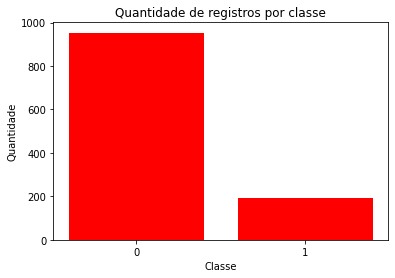

In [125]:
#Contagem de registros por classes
from turtle import color


target_counts = df_depressed_dataset['depressed'].value_counts()
positives = target_counts[1]
negatives = target_counts[0]

#Proporção em %
prop = (positives/negatives)*100
print('\nA variável target do treino possui {}% de positivos.'. format(round(prop,2)))

#Gráfico
plt.bar(target_counts.index, target_counts,color='red')
plt.xticks([0, 1])
plt.xlabel('Classe')
plt.ylabel('Quantidade')
plt.title('Quantidade de registros por classe')


#### Tipos de dados nas colunas

Text(0.5, 1.0, 'Quantidade de colunas por tipos de dados')

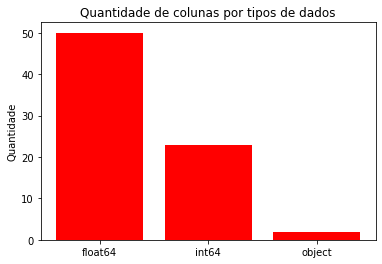

In [126]:
tipos_dados = df_depressed_dataset.dtypes.value_counts()

#Recurso visual
plt.bar(tipos_dados.index.astype(str), tipos_dados.values, color='red')
plt.ylabel('Quantidade')
plt.title('Quantidade de colunas por tipos de dados')

In [127]:
print('Podemos observar que temos variáveis em diferentes escalas\nO desvio padrão (std) alto')
df_depressed_dataset.describe()

Podemos observar que temos variáveis em diferentes escalas
O desvio padrão (std) alto


,surveyid,village,femaleres,married,children,hhsize,edu,hh_children,hh_totalmembers,cons_nondurable,asset_livestock,asset_durable,asset_phone,asset_savings,asset_land_owned_total,asset_niceroof,cons_allfood,cons_ownfood,cons_alcohol,cons_tobacco,cons_med_total,cons_med_children,cons_ed,cons_social,cons_other,ent_wagelabor,ent_ownfarm,ent_business,ent_nonagbusiness,ent_employees,ent_nonag_revenue,ent_nonag_flowcost,ent_farmrevenue,ent_farmexpenses,ent_animalstockrev,ent_total_cost,fs_adskipm_often,fs_adwholed_often,fs_chskipm_often,fs_chwholed_often,fs_meat,fs_enoughtom,fs_sleephun,med_expenses_hh_ep,med_expenses_sp_ep,med_expenses_child_ep,med_portion_sickinjured,med_port_sick_child,med_afford_port,med_sickdays_hhave,med_healthconsult,med_vacc_newborns,med_child_check,med_u5_deaths,ed_expenses,ed_expenses_perkid,ed_schoolattend,ed_sch_missedpc,ed_work_act_pc,labor_primary,wage_expenditures,durable_investment,nondurable_investment,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week
count,1429.00000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1005.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1374.000000,1402.000000,1429.000000,900.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,904.000000,904.000000,1005.000000,1005.000000,1005.000000,560.000000,323.000000,680.000000,1005.000000,904.000000,895.000000,1005.000000,895.000000,1429.0,1429.0,71.000000,851.000000,851.000000,851.000000,846.000000,712.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1147.000000,1429.000000
mean,715.00000,76.286214,0.918125,0.772568,2.883135,4.899230,8.687194,2.041288,4.956219,126.105799,112.970888,144.797796,18.902193,10.165535,0.911025,0.000700,94.189418,8.278906,1.159212,0.638583,2.490822,1.671862,2.731175,3.561964,21.379253,0.179846,0.251924,0.107768,0.260322,0.032890,34.804122,17.235456,4.497855,1.933611,3.723105,21.440986,4.087124,0.918474,3.015487,0.452434,3.032836,0.264677,0.373134,5.612244,7.841135,3.608922,0.516922,0.492901,0.791305,1.924397,0.692294,1.0,1.0,0.509859,51.500386,18.057173,0.703054,1.337025,0.751030,0.213436,20.741777,284.918104,34.337696,0.013296,0.475194,0.070679,4.080613,3.605420,0.188943,2.114914,0.093772,0.169137,3.251225
std,412.66108,66.444012,0.274271,0.419320,1.874472,2.157894,2.923532,2.044081,2.130240,137.591884,237.350489,191.952725,27.552131,75.140134,1.598780,0.026454,112.210862,15.271976,6.350078,2.772324,11.559653,10.058019,7.910116,7.283909,27.628235,0.384194,0.434270,0.310195,0.438964,0.382984,250.224718,105.959383,8.293021,4.012755,11.631465,107.629227,6.327566,2.607594,5.412373,1.728997,2.212765,0.441381,0.483878,10.780444,17.363659,13.274940,0.321939,0.369836,0.339510,3.411772,0.379135,0.0,0.0,0.215925,109.813120,29.959977,0.338945,2.590840,0.830065,0.409876,716.126179,384.790615,144.221318,0.114579,5.857223,0.256377,28.574333,29.223058,0.391601,18.174208,0.291613,0.375036,1.694201
min,1.00000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-160.153700,0.000000,0.000000,0.000000,0.000000,0.000000
25%,358.00000,24.000000,1.000000,1.000000,

### Count NAN in each column

In [128]:
df_depressed_dataset.isnull().sum().sort_values().tail(30)

cons_ownfood                  0
cons_allfood                  0
asset_niceroof                0
asset_savings                 0
asset_land_owned_total        0
age                           1
cons_tobacco                 27
cons_alcohol                 55
depressed                   282
fs_enoughtom                424
hh_totalmembers             424
fs_meat                     424
med_sickdays_hhave          424
fs_sleephun                 424
med_portion_sickinjured     424
med_port_sick_child         525
fs_chskipm_often            525
fs_chwholed_often           525
cons_med_children           529
med_healthconsult           534
med_afford_port             534
ed_expenses                 578
ed_expenses_perkid          578
ed_schoolattend             578
ed_sch_missedpc             583
ed_work_act_pc              717
med_expenses_child_ep       749
med_expenses_hh_ep          869
med_expenses_sp_ep         1106
med_u5_deaths              1358
dtype: int64

## Detecção de outliers

Melhorar a perfomance do R² (score)

<AxesSubplot:xlabel='children'>

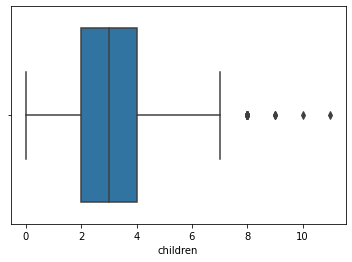

In [129]:
sns.boxplot(df_depressed_dataset.children)

<AxesSubplot:xlabel='edu'>

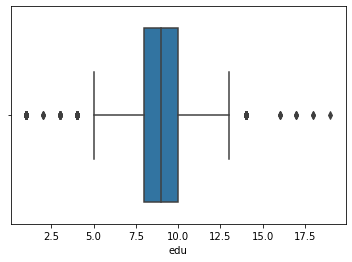

In [130]:
sns.boxplot(df_depressed_dataset.edu)

<AxesSubplot:xlabel='hh_children'>

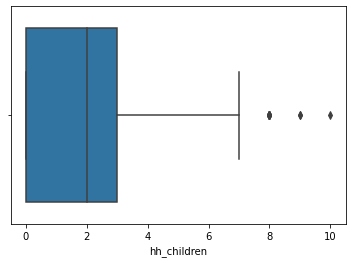

In [131]:
sns.boxplot(df_depressed_dataset.hh_children)

In [132]:
df_depressed_dataset

,surveyid,village,survey_date,femaleres,age,married,children,hhsize,edu,hh_children,hh_totalmembers,cons_nondurable,asset_livestock,asset_durable,asset_phone,asset_savings,asset_land_owned_total,asset_niceroof,cons_allfood,cons_ownfood,cons_alcohol,cons_tobacco,cons_med_total,cons_med_children,cons_ed,cons_social,cons_other,ent_wagelabor,ent_ownfarm,ent_business,ent_nonagbusiness,ent_employees,ent_nonag_revenue,ent_nonag_flowcost,ent_farmrevenue,ent_farmexpenses,ent_animalstockrev,ent_total_cost,fs_adskipm_often,fs_adwholed_often,fs_chskipm_often,fs_chwholed_often,fs_meat,fs_enoughtom,fs_sleephun,med_expenses_hh_ep,med_expenses_sp_ep,med_expenses_child_ep,med_portion_sickinjured,med_port_sick_child,med_afford_port,med_sickdays_hhave,med_healthconsult,med_vacc_newborns,med_child_check,med_u5_deaths,ed_expenses,ed_expenses_perkid,ed_schoolattend,ed_sch_missedpc,ed_work_act_pc,labor_primary,wage_expenditures,durable_investment,nondurable_investment,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week
0,926,91,23-Nov-61,1,28,1,4,6,10,0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0,0.000000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0,0.0,0,0.000000,0.000000,1,0.000000,0,0.0,5
1,747,57,24-Oct-61,1,23,1,3,5,8,0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0,0.000000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0,0.0,1,4.804611,4.804611,0,0.000000,0,1.0,3
2,1190,115,05-Oct-61,1,22,1,3,5,9,0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0,0.000000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0,0.0,0,8.007685,8.007685,1,0.000000,0,0.0,5
3,1065,97,23-Sep-61,1,27,1,2,4,10,2,4.0,378.832920,526.671080,196.989040,24.023054,49.647648,0.00,0,289.173520,36.434967,0.0,0.0,4.163996,0.960922,1.681614,39.771500,44.042267,0,1,0,1,0,32.030739,0.0,22.288055,1.875133,16.282293,17.890503,0.0,0.0,0.0,0.0,3.0,1.0,1.0,NaN,NaN,NaN,0.000000,0.00,NaN,0.000000,NaN,1,1,NaN,20.179367,10.089684,0.500000,1.500000,0.000000,0,0,778.112300,69.219765,0,0.0,0,0.000000,0.000000,1,1.249199,0,0.0,0
4,806,42,12-Sep-61,0,59,0,4,6,10,4,6.0,258.671880,8.260629,173.526540,19.218445,0.000000,0.50,0,173.010990,0.870168,0.0,0.0,0.800768,0.800768,2.268844,8.087762,74.503502,1,0,0,0,0,0.000000,0.0,0.533846,2.073101,0.000000,2.073101,0.0,0.0,0.0,0.0,2.0,0.0,0.0,NaN,NaN,1.233183,0.333333,0.25,0.5,1.166667,1.0,1,1,NaN,27.226130,6.806532,0.750000,1.750000,1.250000,1,0,201.005620,4.341945,0,0.0,0,0.000000,0.000000,0,0.000000,0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,255,22,24-Sep-61,1,25,1,1,3,7,0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0,0.000000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0,0.0,0,0.000000,0.000000,0,0.000000,0,NaN,1
1425,547,69,23-Nov-61,1,28,1,4,6,10,4,6.0,248.608690,8.260629,157.110780,24.023054,24.023054,3.25,0,155.065580,10.476722,0.0,0.0,0.000000,0.000000,13.145949,8.808454,71.588707,0,1,0,0,0,0.000000,0.0,23.022095,10.215360,1.468076,10.215360,3.0,0

In [133]:
df_depressed_dataset.head(5)

,surveyid,village,survey_date,femaleres,age,married,children,hhsize,edu,hh_children,hh_totalmembers,cons_nondurable,asset_livestock,asset_durable,asset_phone,asset_savings,asset_land_owned_total,asset_niceroof,cons_allfood,cons_ownfood,cons_alcohol,cons_tobacco,cons_med_total,cons_med_children,cons_ed,cons_social,cons_other,ent_wagelabor,ent_ownfarm,ent_business,ent_nonagbusiness,ent_employees,ent_nonag_revenue,ent_nonag_flowcost,ent_farmrevenue,ent_farmexpenses,ent_animalstockrev,ent_total_cost,fs_adskipm_often,fs_adwholed_often,fs_chskipm_often,fs_chwholed_often,fs_meat,fs_enoughtom,fs_sleephun,med_expenses_hh_ep,med_expenses_sp_ep,med_expenses_child_ep,med_portion_sickinjured,med_port_sick_child,med_afford_port,med_sickdays_hhave,med_healthconsult,med_vacc_newborns,med_child_check,med_u5_deaths,ed_expenses,ed_expenses_perkid,ed_schoolattend,ed_sch_missedpc,ed_work_act_pc,labor_primary,wage_expenditures,durable_investment,nondurable_investment,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week
0,926,91,23-Nov-61,1,28,1,4,6,10,0,NaN,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.00000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,0,0.000000,0.000000,1,0.000000,0,0.0,5
1,747,57,24-Oct-61,1,23,1,3,5,8,0,NaN,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.00000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,1,4.804611,4.804611,0,0.000000,0,1.0,3
2,1190,115,05-Oct-61,1,22,1,3,5,9,0,NaN,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.00000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,0,8.007685,8.007685,1,0.000000,0,0.0,5
3,1065,97,23-Sep-61,1,27,1,2,4,10,2,4.0,378.83292,526.671080,196.98904,24.023054,49.647648,0.0,0,289.17352,36.434967,0.0,0.0,4.163996,0.960922,1.681614,39.771500,44.042267,0,1,0,1,0,32.030739,0.0,22.288055,1.875133,16.282293,17.890503,0.0,0.0,0.0,0.0,3.0,1.0,1.0,NaN,NaN,NaN,0.000000,0.00,NaN,0.000000,NaN,1,1,NaN,20.179367,10.089684,0.50,1.50,0.00,0,0,778.11230,69.219765,0,0.0,0,0.000000,0.000000,1,1.249199,0,0.0,0
4,806,42,12-Sep-61,0,59,0,4,6,10,4,6.0,258.67188,8.260629,173.52654,19.218445,0.000000,0.5,0,173.01099,0.870168,0.0,0.0,0.800768,0.800768,2.268844,8.087762,74.503502,1,0,0,0,0,0.000000,0.0,0.533846,2.073101,0.000000,2.073101,0.0,0.0,0.0,0.0,2.0,0.0,0.0,NaN,NaN,1.233183,0.333333,0.25,0.5,1.166667,1.0,1,1,NaN,27.226130,6.806532,0.75,1.75,1.25,1,0,201.00562,4.341945,0,0.0,0,0.000000,0.000000,0,0.000000,0,0.0,3


In [134]:

# correlation 
print(df_depressed_dataset.corr())

                    surveyid   village  femaleres   married  children  \
surveyid            1.000000  0.662523   0.025015 -0.011441  0.020242   
village             0.662523  1.000000   0.010970  0.026970  0.030428   
femaleres           0.025015  0.010970   1.000000  0.282472  0.214297   
married            -0.011441  0.026970   0.282472  1.000000  0.227206   
children            0.020242  0.030428   0.214297  0.227206  1.000000   
...                      ...       ...        ...       ...       ...   
saved_mpesa         0.045454  0.047495   0.007214  0.078497  0.043458   
amount_saved_mpesa  0.005823 -0.007197  -0.009764  0.024066 -0.003852   
early_survey       -0.059211 -0.062321  -0.000251 -0.003002 -0.029901   
depressed          -0.021138  0.014286  -0.007864 -0.081358  0.009313   
day_of_week        -0.004995 -0.043296   0.000593 -0.048648  0.020938   

                      hhsize       edu  hh_children  hh_totalmembers  \
surveyid            0.017840 -0.037984    -0.002915

## ii) pré-processamento dos dados
abordando aspectos como correção de
outliers e de valores faltantes, codificação de atributos categóricos, discretização de
atributos numéricos, normalização, ajuste de desbalanceamento de classes e
redução de dimensionalidade

#### Removendo colunas irrelevantes

Minha sugestão no primeiro momento é remover apenas as colunas que pela sua definição não parecem ter relevância/poder preditivo, o que eu acredito ser o caso das duas variáveis com "_id" no final (não olhei em profundidade os dados). Se as variáveis forem categóricas e tiverem muitos valores possíveis, também pode ser difícil usar no modelo. Neste caso, você pode optar por manter apenas um subconjunto de valores para as categorias mais frequentes, e todas as outras agrupar em uma única categoria ("Outros", por exemplo).

In [135]:
# Colunas categoricas
print(df_depressed_dataset.select_dtypes(include=['object']).columns.tolist())

# Print shape do DataFrame original
print("Shape do DataFrame original: {}".format(df_depressed_dataset.shape))

# Não tenho tempo para trabalhar com colunas de data agora
df_depressed_dataset.drop(columns=['surveyid','village','survey_date','hhsize','cons_nondurable',
'asset_livestock','asset_durable','asset_phone','asset_land_owned_total',
'asset_niceroof','cons_allfood','cons_ownfood','cons_med_total',
'cons_med_children','cons_ed','cons_social','cons_other','ent_wagelabor',
'ent_ownfarm','ent_business','ent_nonagbusiness','ent_employees',
'ent_nonag_revenue','ent_nonag_flowcost','ent_farmrevenue','ent_farmexpenses',
 'ent_animalstockrev','ent_total_cost','fs_adskipm_often','fs_adwholed_often',
 'fs_chskipm_often','fs_chwholed_often','fs_meat','fs_enoughtom','fs_sleephun',
 'med_expenses_hh_ep','med_expenses_sp_ep','med_expenses_child_ep',
 'med_portion_sickinjured','med_port_sick_child','med_afford_port','med_sickdays_hhave',
 'med_healthconsult','med_vacc_newborns','med_child_check','med_u5_deaths','ed_expenses',
 'ed_expenses_perkid','ed_schoolattend','ed_sch_missedpc',
 'ed_work_act_pc','labor_primary','wage_expenditures','early_survey','day_of_week'], axis=1, inplace=True)


# Print shape do novo DataFrame
print("Shape of DataFrame depois as colunas irrelevantes: {}".format(df_depressed_dataset.shape))
# durable_investment,nondurable_investment,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa



['survey_date', 'age']
Shape do DataFrame original: (1429, 75)
Shape of DataFrame depois as colunas irrelevantes: (1429, 20)


array([[<AxesSubplot:title={'center':'femaleres'}>,
        <AxesSubplot:title={'center':'married'}>,
        <AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'edu'}>],
       [<AxesSubplot:title={'center':'hh_children'}>,
        <AxesSubplot:title={'center':'hh_totalmembers'}>,
        <AxesSubplot:title={'center':'asset_savings'}>,
        <AxesSubplot:title={'center':'cons_alcohol'}>],
       [<AxesSubplot:title={'center':'cons_tobacco'}>,
        <AxesSubplot:title={'center':'durable_investment'}>,
        <AxesSubplot:title={'center':'nondurable_investment'}>,
        <AxesSubplot:title={'center':'given_mpesa'}>],
       [<AxesSubplot:title={'center':'amount_given_mpesa'}>,
        <AxesSubplot:title={'center':'received_mpesa'}>,
        <AxesSubplot:title={'center':'amount_received_mpesa'}>,
        <AxesSubplot:title={'center':'net_mpesa'}>],
       [<AxesSubplot:title={'center':'saved_mpesa'}>,
        <AxesSubplot:title={'center':'amount_saved_m

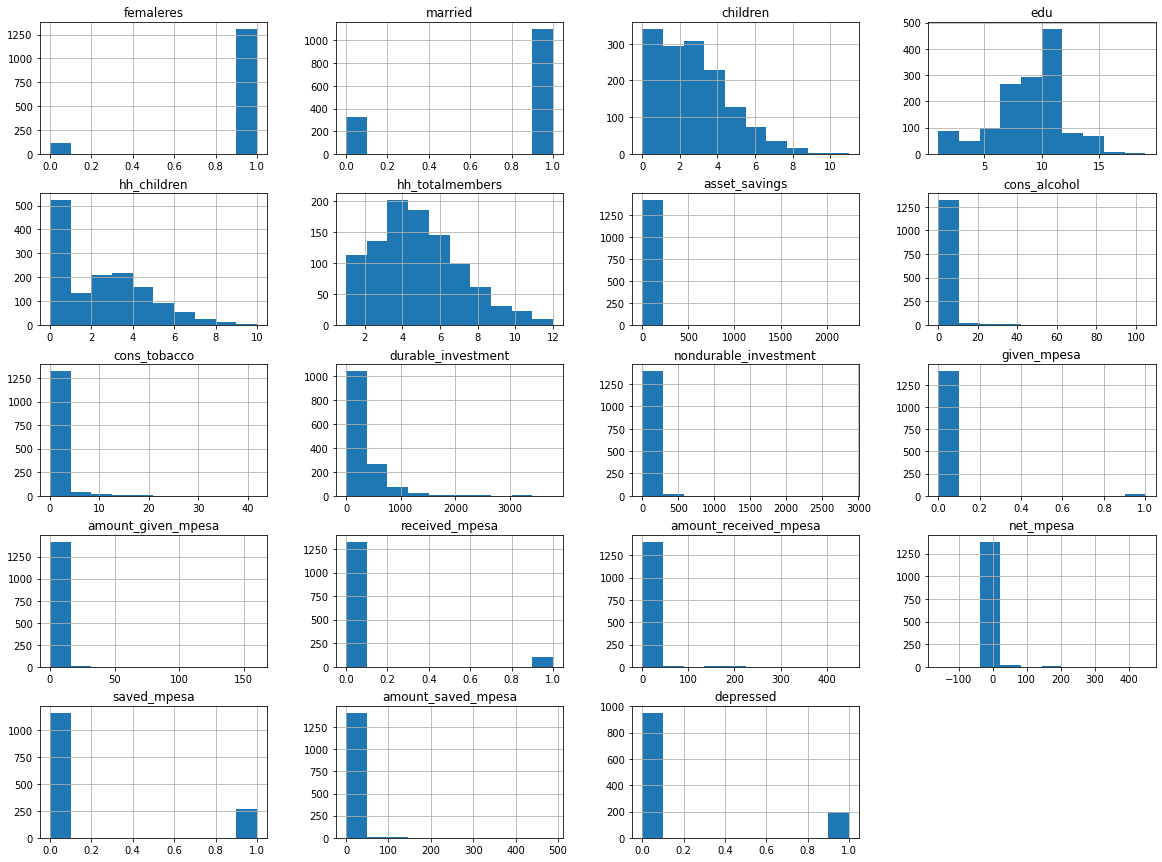

In [136]:
df_depressed_dataset.columns
df_depressed_dataset.hist(figsize=[20, 15])

### Removendo NAN


In [137]:
df_depressed_dataset.columns

Index(['femaleres', 'age', 'married', 'children', 'edu', 'hh_children',
       'hh_totalmembers', 'asset_savings', 'cons_alcohol', 'cons_tobacco',
       'durable_investment', 'nondurable_investment', 'given_mpesa',
       'amount_given_mpesa', 'received_mpesa', 'amount_received_mpesa',
       'net_mpesa', 'saved_mpesa', 'amount_saved_mpesa', 'depressed'],
      dtype='object')

In [138]:
df_depressed_dataset

,femaleres,age,married,children,edu,hh_children,hh_totalmembers,asset_savings,cons_alcohol,cons_tobacco,durable_investment,nondurable_investment,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,depressed
0,1,28,1,4,10,0,NaN,0.000000,0.0,0.0,0.000000,0.000000,0,0.0,0,0.000000,0.000000,1,0.000000,0.0
1,1,23,1,3,8,0,NaN,0.000000,0.0,0.0,0.000000,0.000000,0,0.0,1,4.804611,4.804611,0,0.000000,1.0
2,1,22,1,3,9,0,NaN,0.000000,0.0,0.0,0.000000,0.000000,0,0.0,0,8.007685,8.007685,1,0.000000,0.0
3,1,27,1,2,10,2,4.0,49.647648,0.0,0.0,778.112300,69.219765,0,0.0,0,0.000000,0.000000,1,1.249199,0.0
4,0,59,0,4,10,4,6.0,0.000000,0.0,0.0,201.005620,4.341945,0,0.0,0,0.000000,0.000000,0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,1,25,1,1,7,0,NaN,0.000000,0.0,0.0,0.000000,0.000000,0,0.0,0,0.000000,0.000000,0,0.000000,NaN
1425,1,28,1,4,10,4,6.0,24.023054,0.0,0.0,182.347700,47.384361,0,0.0,0,0.000000,0.000000,1,0.000000,NaN
1426,1,66,0,0,1,0,1.0,0.000000,0.0,0.0,46.444572,0.104545,0,0.0,0,0.000000,0.000000,0,0.000000,NaN
1427,1,51,1,1,12,0,NaN,0.000000,0.0,0.0,0.000000,0.000000,0,0.0,0,0.000000,0.000000,0,0.000000,NaN


In [139]:
df_columns = ['depressed']

for df_column in df_columns:
   print(df_column)
   drop_nan = df_depressed_dataset.drop(df_depressed_dataset[(df_depressed_dataset[df_column].isnull())].index, axis=0, inplace=True)

df_filter = df_depressed_dataset.isnull().sum()

df_filter

depressed


femaleres                  0
age                        0
married                    0
children                   0
edu                        0
hh_children                0
hh_totalmembers          334
asset_savings              0
cons_alcohol              44
cons_tobacco              20
durable_investment         0
nondurable_investment      0
given_mpesa                0
amount_given_mpesa         0
received_mpesa             0
amount_received_mpesa      0
net_mpesa                  0
saved_mpesa                0
amount_saved_mpesa         0
depressed                  0
dtype: int64

In [140]:
#Imputing dados faltantes em uma ML Pipeline I
# Import o módulo KNNImputer 
from sklearn.impute import KNNImputer 

# Setup the Imputation transformer: imputer
imputer = KNNImputer(n_neighbors=5)
columnsDropNan = df_depressed_dataset[['hh_totalmembers', 'cons_alcohol', 'cons_tobacco']] 
df_depressed_dataset[['hh_totalmembers', 'cons_alcohol', 'cons_tobacco']] = imputer.fit_transform(columnsDropNan.values) 
# Setup the pipeline with the required steps: steps
steps = [('imputation', imputer)]


In [141]:
df_filter = df_depressed_dataset.isnull().sum()
df_filter

femaleres                0
age                      0
married                  0
children                 0
edu                      0
hh_children              0
hh_totalmembers          0
asset_savings            0
cons_alcohol             0
cons_tobacco             0
durable_investment       0
nondurable_investment    0
given_mpesa              0
amount_given_mpesa       0
received_mpesa           0
amount_received_mpesa    0
net_mpesa                0
saved_mpesa              0
amount_saved_mpesa       0
depressed                0
dtype: int64

In [142]:
df_depressed_dataset

,femaleres,age,married,children,edu,hh_children,hh_totalmembers,asset_savings,cons_alcohol,cons_tobacco,durable_investment,nondurable_investment,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,depressed
0,1,28,1,4,10,0,5.6,0.000000,0.0,0.0,0.000000,0.000000,0,0.0,0,0.000000,0.000000,1,0.000000,0.0
1,1,23,1,3,8,0,5.6,0.000000,0.0,0.0,0.000000,0.000000,0,0.0,1,4.804611,4.804611,0,0.000000,1.0
2,1,22,1,3,9,0,5.6,0.000000,0.0,0.0,0.000000,0.000000,0,0.0,0,8.007685,8.007685,1,0.000000,0.0
3,1,27,1,2,10,2,4.0,49.647648,0.0,0.0,778.112300,69.219765,0,0.0,0,0.000000,0.000000,1,1.249199,0.0
4,0,59,0,4,10,4,6.0,0.000000,0.0,0.0,201.005620,4.341945,0,0.0,0,0.000000,0.000000,0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1142,1,39,1,0,12,0,4.0,32.030739,0.0,0.0,612.799560,44.197971,0,0.0,0,0.000000,0.000000,0,0.000000,1.0
1143,1,21,0,3,10,3,4.0,0.000000,0.0,0.0,569.850340,48.166222,0,0.0,0,0.000000,0.000000,1,0.000000,0.0
1144,1,44,1,6,6,6,8.0,12.812296,0.0,0.0,252.650100,14.711897,0,0.0,0,0.000000,0.000000,0,0.000000,0.0
1145,1,23,1,1,7,1,3.0,0.000000,0.0,0.0,141.736020,0.720692,0,0.0,0,0.000000,0.000000,1,0.080077,0.0


#### Valores ausentes

In [143]:
# Função que deleta registros duplicados da base (Mantendo apenas o primeiro registro a cada grupo de duplicatas)
def DupRegClean(df):
    # Registros duplicados podem causar ruído nos algoritmos de machine learning portanto iremos excluí-los.
    # (Se por acaso colunas duplicadas estierem presentes nos datasets de treino e teste, os resultados podem se mostrar tendenciosos).
    print('df antes: ',df.shape)
    df_saida = df.drop_duplicates(inplace=False,keep='first')
    print('Após a limpeza de registros duplicados: ',df_saida.shape)
    return df_saida

# Aplica limpeza
df1 = DupRegClean(df_depressed_dataset)

df antes:  (1147, 20)
Após a limpeza de registros duplicados:  (1125, 20)


### Balancemento de classes

In [144]:
from cmath import nan
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

X = df_depressed_dataset.drop(target_column_name, axis=1).fillna(0)
y = df_depressed_dataset[target_column_name]

# undersampling e oversampling

rus = RandomUnderSampler(random_state=0, sampling_strategy={0:500})
x_novo, y_novo = rus.fit_resample(X, y)
print(sorted(Counter(y_novo).items()))

df_depressed_dataset.iloc[:,:-1] =  x_novo
df_depressed_dataset[target_column_name] = y_novo
df_depressed_dataset = df_depressed_dataset.dropna()

rus = RandomOverSampler(random_state=0, sampling_strategy={1:300})
x_novo, y_novo = rus.fit_resample(x_novo, y_novo)
print(sorted(Counter(y_novo).items()))

df_depressed_dataset.iloc[:,:-1] =  x_novo
df_depressed_dataset[target_column_name] = y_novo
df_depressed_dataset = df_depressed_dataset.dropna()



[(0.0, 500), (1.0, 194)]
[(0.0, 500), (1.0, 300)]



A variável target do treino possui 38.8% de positivos.


Text(0.5, 1.0, 'Quantidade de registros por classe')

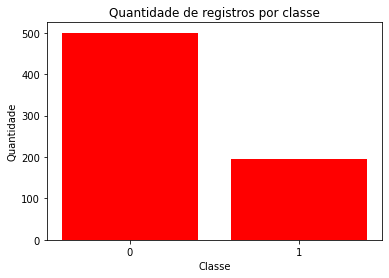

In [145]:
target_counts = df_depressed_dataset['depressed'].value_counts()
positives = target_counts[1]
negatives = target_counts[0]

#Proporção em %
prop = (positives/negatives)*100
print('\nA variável target do treino possui {}% de positivos.'. format(round(prop,2)))

#Gráfico
plt.bar(target_counts.index, target_counts,color='red')
plt.xticks([0, 1])
plt.xlabel('Classe')
plt.ylabel('Quantidade')
plt.title('Quantidade de registros por classe')

In [146]:
df_depressed_dataset

,femaleres,age,married,children,edu,hh_children,hh_totalmembers,asset_savings,cons_alcohol,cons_tobacco,durable_investment,nondurable_investment,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,depressed
0,1,22,0,2,7,2,3.0,0.000000,0.0,0.0,5.765533,0.000000,0,0.0,0,0.0,0.0,0,0.000000,0.0
1,1,21,1,3,11,3,5.0,4.804611,0.0,0.0,420.298030,15.401447,0,0.0,0,0.0,0.0,1,1.601537,0.0
2,1,32,1,4,12,4,6.0,8.007685,0.0,0.0,65.115196,15.481524,0,0.0,0,0.0,0.0,0,0.000000,0.0
3,1,29,1,5,10,0,5.6,0.000000,0.0,0.0,0.000000,0.000000,0,0.0,0,0.0,0.0,0,0.000000,0.0
4,1,34,1,3,10,3,5.0,0.000000,0.0,0.0,1075.745200,6.450635,0,0.0,0,0.0,0.0,0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,1,23,0,3,10,0,5.6,0.000000,0.0,0.0,0.000000,0.000000,0,0.0,0,0.0,0.0,0,0.000000,1.0
690,1,35,1,2,10,2,4.0,12.812296,0.0,0.0,244.146070,24.946163,0,0.0,0,0.0,0.0,0,0.000000,1.0
691,1,36,0,4,9,0,5.6,0.000000,0.0,0.0,0.000000,0.000000,0,0.0,0,0.0,0.0,0,0.000000,1.0
692,1,39,1,0,12,0,4.0,32.030739,0.0,0.0,612.799560,44.197971,0,0.0,0,0.0,0.0,0,0.000000,1.0


In [147]:
df_depressed_dataset.head()

,femaleres,age,married,children,edu,hh_children,hh_totalmembers,asset_savings,cons_alcohol,cons_tobacco,durable_investment,nondurable_investment,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,depressed
0,1,22,0,2,7,2,3.0,0.000000,0.0,0.0,5.765533,0.000000,0,0.0,0,0.0,0.0,0,0.000000,0.0
1,1,21,1,3,11,3,5.0,4.804611,0.0,0.0,420.298030,15.401447,0,0.0,0,0.0,0.0,1,1.601537,0.0
2,1,32,1,4,12,4,6.0,8.007685,0.0,0.0,65.115196,15.481524,0,0.0,0,0.0,0.0,0,0.000000,0.0
3,1,29,1,5,10,0,5.6,0.000000,0.0,0.0,0.000000,0.000000,0,0.0,0,0.0,0.0,0,0.000000,0.0
4,1,34,1,3,10,3,5.0,0.000000,0.0,0.0,1075.745200,6.450635,0,0.0,0,0.0,0.0,0,0.000000,0.0


In [148]:
df_depressed_dataset.columns

Index(['femaleres', 'age', 'married', 'children', 'edu', 'hh_children',
       'hh_totalmembers', 'asset_savings', 'cons_alcohol', 'cons_tobacco',
       'durable_investment', 'nondurable_investment', 'given_mpesa',
       'amount_given_mpesa', 'received_mpesa', 'amount_received_mpesa',
       'net_mpesa', 'saved_mpesa', 'amount_saved_mpesa', 'depressed'],
      dtype='object')

#### z-score - remover outliers

Z score = (x -mean) / std. deviation

- df antes:  (1409, 23)


children

m
 2.8328530259365996 
s
 1.8883118999319368
2 - 
m
 2.8328530259365996 
s
 1.8883118999319368
edu

m
 8.549927641099856 
s
 2.8909328527093416
2 - 
m
 8.549927641099856 
s
 2.8909328527093416
hh_children

m
 1.9710144927536233 
s
 1.982320514694424
2 - 
m
 1.9710144927536233 
s
 1.982320514694424
hh_totalmembers

m
 5.022481751824818 
s
 1.6924451197139736
2 - 
m
 5.022481751824818 
s
 1.6924451197139736
asset_savings

m
 6.165307729311859 
s
 19.523186486697995
2 - 
m
 6.165307729311859 
s
 19.523186486697995
cons_alcohol

m
 1.2904308961676647 
s
 6.838894981869529
2 - 
m
 1.2904308961676647 
s
 6.838894981869529
cons_tobacco

m
 0.5274016121036585 
s
 2.378826967211058
2 - 
m
 0.5274016121036585 
s
 2.378826967211058
durable_investment

m
 266.1879859071318 
s
 363.6267692862977
2 - 
m
 266.1879859071318 
s
 363.6267692862977
nondurable_investment

m
 29.546860172647797 
s
 128.05744701356494
2 - 
m
 29.546860172647797 
s
 128.05744701356494
given_mpesa

m
 0.014331210191

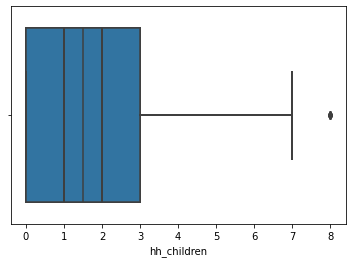

In [149]:
df_columns_z = ['children', 'edu', 'hh_children',
       'hh_totalmembers', 'asset_savings', 'cons_alcohol', 'cons_tobacco',
       'durable_investment', 'nondurable_investment', 'given_mpesa',
       'amount_given_mpesa', 'received_mpesa', 'amount_received_mpesa',
       'net_mpesa', 'saved_mpesa', 'amount_saved_mpesa']

for column in df_columns_z:
    print(column)
    m = np.mean(df_depressed_dataset[column])
    s = np.std(df_depressed_dataset[column])
    print('\nm\n', m, '\ns\n', s)
    df_depressed_dataset['Z-score'] = (df_depressed_dataset[column] - m)/s
    df_outlier = df_depressed_dataset[abs(df_depressed_dataset['Z-score']) > 3]
    df_depressed_dataset = df_depressed_dataset.drop(df_outlier.index)
    print('2 - \nm\n', m, '\ns\n', s)
    sns.boxplot(x=df_depressed_dataset.hh_children)

df_depressed_dataset.drop('Z-score', axis=1, inplace=True)

<AxesSubplot:xlabel='children'>

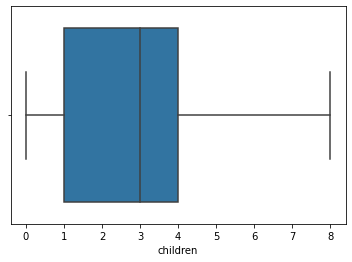

In [150]:
sns.boxplot(df_depressed_dataset.children)

In [151]:
df_depressed_dataset

,femaleres,age,married,children,edu,hh_children,hh_totalmembers,asset_savings,cons_alcohol,cons_tobacco,durable_investment,nondurable_investment,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,depressed
0,1,22,0,2,7,2,3.0,0.000000,0.0,0.0,5.765533,0.000000,0,0.0,0,0.0,0.0,0,0.000000,0.0
1,1,21,1,3,11,3,5.0,4.804611,0.0,0.0,420.298030,15.401447,0,0.0,0,0.0,0.0,1,1.601537,0.0
2,1,32,1,4,12,4,6.0,8.007685,0.0,0.0,65.115196,15.481524,0,0.0,0,0.0,0.0,0,0.000000,0.0
3,1,29,1,5,10,0,5.6,0.000000,0.0,0.0,0.000000,0.000000,0,0.0,0,0.0,0.0,0,0.000000,0.0
4,1,34,1,3,10,3,5.0,0.000000,0.0,0.0,1075.745200,6.450635,0,0.0,0,0.0,0.0,0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,1,23,0,3,10,0,5.6,0.000000,0.0,0.0,0.000000,0.000000,0,0.0,0,0.0,0.0,0,0.000000,1.0
690,1,35,1,2,10,2,4.0,12.812296,0.0,0.0,244.146070,24.946163,0,0.0,0,0.0,0.0,0,0.000000,1.0
691,1,36,0,4,9,0,5.6,0.000000,0.0,0.0,0.000000,0.000000,0,0.0,0,0.0,0.0,0,0.000000,1.0
692,1,39,1,0,12,0,4.0,32.030739,0.0,0.0,612.799560,44.197971,0,0.0,0,0.0,0.0,0,0.000000,1.0


### Pipeline

In [152]:
from sklearn.pipeline import Pipeline

# Setup the pipeline steps: steps
steps = [('imputation', imputer)]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

#### Padronização das features para aplicação do modelo

In [153]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
column_names_to_normalize = ['children', 'edu', 'hh_children',
       'hh_totalmembers', 'asset_savings', 'cons_alcohol', 'cons_tobacco',
       'durable_investment', 'nondurable_investment', 'given_mpesa',
       'amount_given_mpesa', 'received_mpesa', 'amount_received_mpesa',
       'net_mpesa', 'saved_mpesa', 'amount_saved_mpesa']

for column in column_names_to_normalize:
       x = df_depressed_dataset[column].values
       x_normalized = scaler.fit_transform(x.reshape(-1, 1))
       df_depressed_dataset[column] = x_normalized

       # X_train_ = X_train.copy()
       # print("X_train_", X_train_)
       # X_test_ = X_test.copy()
       # X_train = scaler.fit_transform(x.reshape(-1, 1))
       # print("X_train ", X_train)
       # X_test  = scaler.transform(x.reshape(-1, 1))
       # #x_scaled =  scaler.fit_transform(x.reshape(-1, 1))
       # df_temp = pd.DataFrame(X_train, columns=[column], index = df_depressed_dataset.index)
       # df_depressed_dataset[column] = df_temp
       # df_temp_test = pd.DataFrame(X_test, columns=[column], index = df_depressed_dataset.index)
       # df_depressed_dataset[column] = df_temp_test


print(df_depressed_dataset)

""" # Padronização das features para aplicação do modelo
scaler = StandardScaler()

# Transformação
X_train_ = X_train.copy()
print("X_train_", X_train_)
X_test_ = X_train.copy()
X_train = scaler.fit_transform(X_train)
print("X_train ", X_train)
X_test  = scaler.transform(X_test)

# Variancia total do dataframe após a padronização
std_apos = X_train.std()
print('Desvio padrão após a padronização: ', round(std_apos,2))
# Transformando os datasets em pandas dataframes para maior facilidade de manipulação
X_train = pd.DataFrame(X_train)
X_test  = pd.DataFrame(X_test) """


     femaleres age  married  children       edu  hh_children  hh_totalmembers  \
0            1  22        0     0.250  0.400000     0.285714            0.250   
1            1  21        1     0.375  0.666667     0.428571            0.500   
2            1  32        1     0.500  0.733333     0.571429            0.625   
3            1  29        1     0.625  0.600000     0.000000            0.575   
4            1  34        1     0.375  0.600000     0.428571            0.500   
..         ...  ..      ...       ...       ...          ...              ...   
689          1  23        0     0.375  0.600000     0.000000            0.575   
690          1  35        1     0.250  0.600000     0.285714            0.375   
691          1  36        0     0.500  0.533333     0.000000            0.575   
692          1  39        1     0.000  0.733333     0.000000            0.375   
693          1  67        0     0.000  0.000000     0.000000            0.000   

     asset_savings  cons_al

' # Padronização das features para aplicação do modelo\nscaler = StandardScaler()\n\n# Transformação\nX_train_ = X_train.copy()\nprint("X_train_", X_train_)\nX_test_ = X_train.copy()\nX_train = scaler.fit_transform(X_train)\nprint("X_train ", X_train)\nX_test  = scaler.transform(X_test)\n\n# Variancia total do dataframe após a padronização\nstd_apos = X_train.std()\nprint(\'Desvio padrão após a padronização: \', round(std_apos,2))\n# Transformando os datasets em pandas dataframes para maior facilidade de manipulação\nX_train = pd.DataFrame(X_train)\nX_test  = pd.DataFrame(X_test) '

### Dividindo datasets


O dataset de treino possui:  37.31 % de classes positivas

O dataset de teste possui:  38.1 % de classes positivas


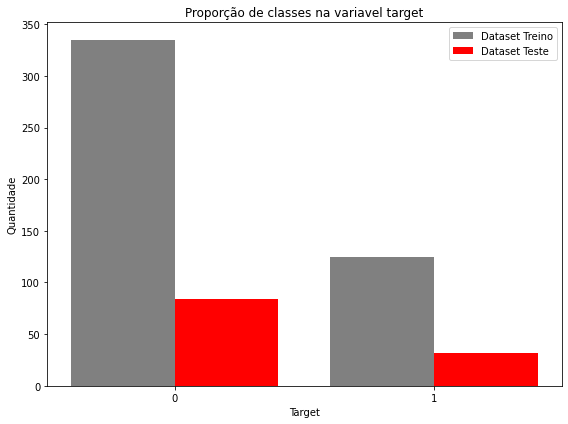

,femaleres,age,married,children,edu,hh_children,hh_totalmembers,asset_savings,cons_alcohol,cons_tobacco,durable_investment,nondurable_investment,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa
692,1,39,1,0.000,0.733333,0.000000,0.375,0.5,0.0,0.0,0.453477,0.136740,0.0,0.0,0.0,0.0,0.0,0.0,0.0
210,1,22,1,0.250,0.533333,0.285714,0.375,0.0,0.0,0.0,0.089542,0.002202,0.0,0.0,0.0,0.0,0.0,0.0,0.0
153,0,45,0,0.250,0.866667,0.285714,0.250,0.0,0.0,0.0,0.130361,0.043809,0.0,0.0,0.0,0.0,0.0,0.0,0.0
174,1,60,0,0.000,0.000000,0.000000,0.575,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
545,1,27,1,0.500,0.533333,0.000000,0.575,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,1,39,1,1.000,0.600000,0.000000,0.575,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0
346,1,28,1,0.250,0.600000,0.285714,0.375,0.0,0.0,0.0,0.105479,0.006854,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1,20,1,0.250,0.666667,0.000000,0.575,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0
209,1,26,0,0.375,0.266667,0.428571,0.375,0.0,0.0,0.0,0.134983,0.005691,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [155]:
# Separando as variáveis da target
X = df_depressed_dataset.drop(target_column_name, axis=1).fillna(0)
y = df_depressed_dataset[target_column_name]

# Dividindo o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42,stratify=y)

# Observando as proporções de classes nas targets do dataset de treino e teste (o objetivo é ter uma proporção semelhante)
fig,ax = plt.subplots(figsize=(8,6))
treino_b = ax.bar(y_train.value_counts().index-0.2,y_train.value_counts().values,0.4, color='gray',label='Dataset Treino')
teste_b  = ax.bar( y_test.value_counts().index+0.2,y_test.value_counts().values ,0.4, color='red' , label='Dataset Teste')

# Percentuais
perc_tr = (y_train.value_counts().values[1]/y_train.value_counts().values[0])*100
print('\nO dataset de treino possui: ',round(perc_tr,2),'% de classes positivas')
perc_ts = (y_test.value_counts().values[1]/y_test.value_counts().values[0])*100
print('\nO dataset de teste possui: ',round(perc_ts,2),'% de classes positivas')

# Recurso visual
ax.set_ylabel('Quantidade')
ax.set_xlabel('Target')
ax.set_title('Proporção de classes na variavel target')
ax.set_xticks([0,1])
ax.legend()
fig.tight_layout()
plt.show()
X_train

## iii) treinamento e validação dos modelos,
utilizando as melhores práticas em relação a estratégias de divisão de dados para otimização de hiperparâmetros e
seleção de modelos

 - Acurácia
 - Precision
 - Recall
 - F1 Score
 - ROC AUC score

In [156]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

# Instancia-se o modelo burro
dc = DummyClassifier(strategy="most_frequent") # O Dummy classifier vai prever sempre a target mais frequente no dataset de treino

# Treino do modelo burro
dc.fit(X_train, y_train)

# Teste de performance
pred_prob = dc.predict_proba(X_train)
preds = dc.predict(X_train)
dumb_score = roc_auc_score(y_train, pred_prob[:,1])
duymb_acc = accuracy_score(y_train, preds)


print('\nAUC Score modelo dumb: ',dumb_score)
print('\nAccuracy Score modelo dumb: ',round(duymb_acc,2))


AUC Score modelo dumb:  0.5

Accuracy Score modelo dumb:  0.73


### Classificação 
Métodos baseados em instâncias
○ K-Vizinhos Mais Próximos
● Métodos baseados em procura
○ Árvores de decisão
● Métodos probabilísticos
○ Naïve Bayes
● Métodos estatísticos
○ Regressão Linear e Regressão Logística
● Métodos baseados em otimização
○ Redes Neurais Artificiais
● Métodos baseados em múltiplos modelos preditivos
○ Florestas Aleatórias, Adaboost, e outros

log regression

Score:  0.59  Desv_padr:  0.03

Recall: 0.52

Precision:  0.3327485996634933

Mean squared error:  0.27391304347826084
[[207 128]
 [ 61  64]]
naive bayes

Score:  0.55  Desv_padr:  0.03

Recall: 0.384

Precision:  0.3213497150997151

Mean squared error:  0.27391304347826084
[[242  93]
 [ 80  45]]
k neighbors

Score:  0.51  Desv_padr:  0.08

Recall: 0.192

Precision:  0.3

Mean squared error:  0.27391304347826084
[[285  50]
 [106  19]]
decision tree

Score:  0.52  Desv_padr:  0.06

Recall: 0.304

Precision:  0.29788093132920723

Mean squared error:  0.27391304347826084
[[251  84]
 [ 91  34]]
random forest

Score:  0.52  Desv_padr:  0.07

Recall: 0.11200000000000002

Precision:  0.2864285714285714

Mean squared error:  0.27391304347826084
[[302  33]
 [112  13]]
support vector classifier

Score:  0.5  Desv_padr:  0.06

Recall: 0.032

Precision:  0.13571428571428573

Mean squared error:  0.27391304347826084
[[266  69]
 [101  24]]
MLP

Score:  0.48  Desv_padr:  0.08

Recall:

(-1.0, 7.0, -1.0, 1.5)

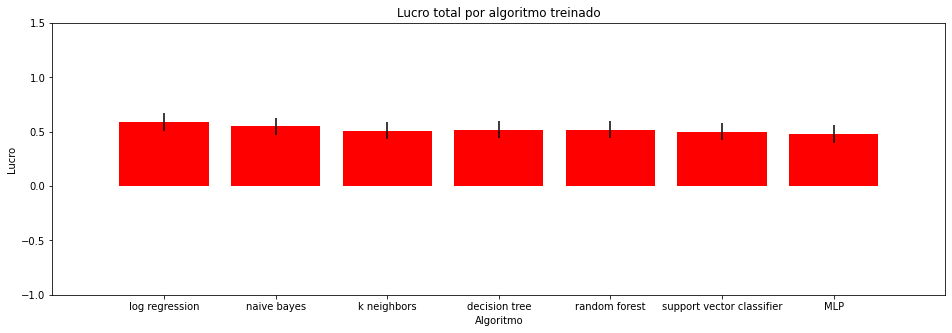

In [160]:
from sklearn.model_selection import cross_val_score, cross_val_predict
#from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import recall_score, precision_score, mean_squared_error, confusion_matrix

# Parâmetros iniciais para cada algoritmo (Vamos buscar ajustar inicialmente os 
# hiperparametros para trabalharem com a target desbalanceada)
naive_bayes_params = [{}]
#xgb_params         = [{"scale_pos_weight":5,"random_state":42}] # 100% de targets dividido pela quantidade 
                                                                # de positivos (20%) = 5
kneighbors_params  = [{"weights":"distance"}] 
svc_params         = [{"class_weight":"balanced", "random_state":42}]
log_reg_params     = [{"class_weight":"balanced","max_iter":10000, "random_state":42}]
dec_tree_params    = [{"class_weight":"balanced", "random_state":42}]
rand_for_params    = [{"class_weight":"balanced","random_state":42}]
mlp_for_params     = [{"activation":"identity", "random_state":42}]

modelclasses = [
     ["naive bayes",       GaussianNB,                 naive_bayes_params]
    #,["XGBoost",           XGBClassifier,                      xgb_params]
    ,["k neighbors",       KNeighborsClassifier,        kneighbors_params]
    ,["support vector classifier", LinearSVC,                  svc_params]
    ,["log regression",    LogisticRegression,             log_reg_params]
    ,["decision tree",     DecisionTreeClassifier,        dec_tree_params]
    ,["random forest",     RandomForestClassifier,        rand_for_params]
    ,["MLP",     MLPClassifier,        mlp_for_params]

]

insights = []
#  Treina e testa cada algoritmo com seus respectivos hiperparâmetros
for modelname, Model, params_list in modelclasses:
    for params in params_list:
        model = Model(**params)
        cv_scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=5)
        score = round(cv_scores.mean(),2)
        recall = cross_val_score(model, X_train, y_train, scoring='recall', cv=5)
        precision = cross_val_score(model, X_train, y_train, scoring='precision', cv=5)
        meanSquaredError = cross_val_score(model, X_train, y_train, 
        scoring='neg_mean_squared_error', cv=5)
        recall_mean = recall.mean()
        precision_mean = precision.mean()
        squared_mean = meanSquaredError.mean()
        score_stddev = round(cv_scores.std(),2)
        y_pred = cross_val_predict(model, X_train, y_train, cv=10)
        conf_mat = confusion_matrix(y_train, y_pred)
        insights.append((modelname, model, params, score,
        score_stddev, recall_mean, precision_mean, conf_mat))

        
insights.sort(key=lambda x:x[-2], reverse=True)

# resultados
modelnames = []
scores = []
for modelname, model, params, score, score_stddev, recall_mean, precision_mean, conf_mat in insights:
    print(modelname)
    print('\nScore: ',score, ' Desv_padr: ',score_stddev)
    print("\nRecall:", recall_mean)
    print("\nPrecision: ", precision_mean)
    print("\nMean squared error: ", squared_mean*(-1))
    print(conf_mat)
    modelnames.append(modelname)
    scores.append(score)
    
# Recurso visual
plt.figure(figsize=(16,5))
plt.bar(modelnames, scores, color='red', yerr=score_stddev)
plt.ylabel('Lucro')
plt.xlabel('Algoritmo')
plt.title('Lucro total por algoritmo treinado')
plt.axis([-1,len(modelnames),-1,1.5])

In [158]:
! pip install xgboost


/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [159]:
colunas = X_train.columns

### III.I Aprimoramento de hiperparâmetros

## iv) interpretação do modelo treinado, 
buscando obter insights sobre o impacto dos atributos na tomada de decisão